In [1]:
import sys
print(sys.path)


['/Users/emilyolafson/GIT/stroke-graph-matching/project/code/jupyter_code', '/Users/emilyolafson/miniforge3/envs/myenv/lib/python39.zip', '/Users/emilyolafson/miniforge3/envs/myenv/lib/python3.9', '/Users/emilyolafson/miniforge3/envs/myenv/lib/python3.9/lib-dynload', '', '/Users/emilyolafson/miniforge3/envs/myenv/lib/python3.9/site-packages', '/Users/emilyolafson/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/extensions', '/Users/emilyolafson/.ipython']


In [4]:
# adapted from Zijin Gu: https://github.com/zijin-gu/scfc-coupling
import scipy.io as sio
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

cwd = os.getcwd()
data_dir = '/Users/emilyolafson/GIT/stroke-graph-matching/data'
roi_number = 268

def extract_fc_corr():
    fc_dir = data_dir +'/pearson_fc/'
    subj_all = np.genfromtxt(fc_dir + 'subjects.txt', dtype = 'str')
    fc_corr = np.zeros([subj_all.shape[0],roi_number,roi_number])
    n = 0
    for subj in subj_all:
        print(subj)
        fccov = sio.loadmat(fc_dir + str(subj))
        fc_corr[n] = fccov['C']
        n += 1
    mdic = {"C": fc_corr}
    print(data_dir)
    sio.savemat(str(data_dir + '/pearson_fc/FCcorr_concat_allsub.mat'), mdic)

def extract_fc_prec():
    fc_dir =data_dir + '/covariance/'
    subj_all = np.genfromtxt(fc_dir + 'subjects.txt', dtype = 'str')
    print(subj_all)
    fc_corr = np.zeros([subj_all.shape[0],roi_number,roi_number])
    n = 0
    trace=[]
    norm=[]
    for subj in subj_all:
        fccov = sio.loadmat(fc_dir + str(subj))
        fc_corr[n] = fccov['C'] # need to use covariance
        n = n+1
        
    # regularized precision calculation
    min_rmse = 1e5
    opt_gamma = 0
    allrmse=[]
    
    for gamma in np.linspace(0, 1,50): #for all gamma values
        inverse = []
        reg_inv = []
        
        for i in range(subj_all.shape[0]): #calculate the unregularized inverse and regularized inverse for a given gamma
            np.fill_diagonal(fc_corr[i],1)

            inverse.append(np.linalg.inv(fc_corr[i]))
            print("Inverse norm: " + str("{:e}".format(np.linalg.norm(np.linalg.inv(fc_corr[i])))))
            reg_inv.append(np.linalg.inv(fc_corr[i] + gamma*np.eye(roi_number)))
            print("Regularized inv. norm: " + str("{:e}".format(np.linalg.norm(np.linalg.inv(fc_corr[i] + gamma*np.eye(roi_number))))))

        group_prec = np.mean(inverse, axis=0) #calculate the mean unregularized inverse across subjects
        print("group_prec norm: " + str("{:e}".format(np.linalg.norm(group_prec))))
        
        diff = []

        # for each subject, calculate the difference between the regularized inverse and group average unregularized inverse.
        for i in range(subj_all.shape[0]):
            print(i)
            diff.append(np.linalg.norm(reg_inv[i][np.triu_indices(roi_number,1)] - group_prec[np.triu_indices(roi_number,1)]))
        rmse = np.mean(diff) #mean difference across subjects
        allrmse.append(rmse)
        print("mean rmse: " + str("{:e}".format(np.mean(rmse))))

        if rmse < min_rmse:
            min_rmse = rmse
            opt_gamma = gamma 
            

    fc_prec = np.zeros([subj_all.shape[0],roi_number,roi_number])
    
    #now calculate regularized inversion matrices based on optimal gamma (should be lambda).
    for i in range(subj_all.shape[0]):
        fc_prec[i] = np.linalg.inv(fc_corr[i] + opt_gamma*np.eye(roi_number))

    mdic = {"C": fc_prec, "gamma": opt_gamma, "rmse":allrmse, "sub_sessID": subj_all}
    output_dir =data_dir + '/precision/'

    sio.savemat(output_dir + 'FCprec_concat_allsub.mat', mdic)
    
for sess in range(0,1):
    extract_fc_prec()
    #extract_fc_corr()
    
    

['SUB10_S1_shen268_GSR_fc_cov.mat' 'SUB10_S2_shen268_GSR_fc_cov.mat'
 'SUB10_S3_shen268_GSR_fc_cov.mat' 'SUB10_S4_shen268_GSR_fc_cov.mat'
 'SUB10_S5_shen268_GSR_fc_cov.mat' 'SUB11_S1_shen268_GSR_fc_cov.mat'
 'SUB11_S2_shen268_GSR_fc_cov.mat' 'SUB11_S3_shen268_GSR_fc_cov.mat'
 'SUB11_S4_shen268_GSR_fc_cov.mat' 'SUB11_S5_shen268_GSR_fc_cov.mat'
 'SUB12_S1_shen268_GSR_fc_cov.mat' 'SUB12_S2_shen268_GSR_fc_cov.mat'
 'SUB12_S3_shen268_GSR_fc_cov.mat' 'SUB13_S1_shen268_GSR_fc_cov.mat'
 'SUB13_S2_shen268_GSR_fc_cov.mat' 'SUB13_S3_shen268_GSR_fc_cov.mat'
 'SUB13_S4_shen268_GSR_fc_cov.mat' 'SUB13_S5_shen268_GSR_fc_cov.mat'
 'SUB14_S1_shen268_GSR_fc_cov.mat' 'SUB14_S2_shen268_GSR_fc_cov.mat'
 'SUB14_S3_shen268_GSR_fc_cov.mat' 'SUB14_S4_shen268_GSR_fc_cov.mat'
 'SUB14_S5_shen268_GSR_fc_cov.mat' 'SUB15_S1_shen268_GSR_fc_cov.mat'
 'SUB15_S2_shen268_GSR_fc_cov.mat' 'SUB15_S3_shen268_GSR_fc_cov.mat'
 'SUB15_S4_shen268_GSR_fc_cov.mat' 'SUB15_S5_shen268_GSR_fc_cov.mat'
 'SUB16_S1_shen268_GSR_fc_cov.mat'

Regularized inv. norm: 1.642839e+01
Inverse norm: 1.646059e+01
Regularized inv. norm: 1.646059e+01
Inverse norm: 1.682076e+01
Regularized inv. norm: 1.682076e+01
Inverse norm: 1.657578e+01
Regularized inv. norm: 1.657578e+01
Inverse norm: 1.681035e+01
Regularized inv. norm: 1.681035e+01
Inverse norm: 1.648421e+01
Regularized inv. norm: 1.648421e+01
Inverse norm: 1.662209e+01
Regularized inv. norm: 1.662209e+01
Inverse norm: 1.641968e+01
Regularized inv. norm: 1.641968e+01
Inverse norm: 1.640556e+01
Regularized inv. norm: 1.640556e+01
Inverse norm: 1.644773e+01
Regularized inv. norm: 1.644773e+01
Inverse norm: 1.655515e+01
Regularized inv. norm: 1.655515e+01
Inverse norm: 1.647280e+01
Regularized inv. norm: 1.647280e+01
Inverse norm: 1.663624e+01
Regularized inv. norm: 1.663624e+01
Inverse norm: 1.643898e+01
Regularized inv. norm: 1.643898e+01
Inverse norm: 1.646710e+01
Regularized inv. norm: 1.646710e+01
Inverse norm: 1.645725e+01
Regularized inv. norm: 1.645725e+01
Inverse norm: 1.647

Inverse norm: 1.649958e+01
Regularized inv. norm: 1.616558e+01
Inverse norm: 1.652620e+01
Regularized inv. norm: 1.619092e+01
Inverse norm: 1.655349e+01
Regularized inv. norm: 1.621679e+01
Inverse norm: 1.675493e+01
Regularized inv. norm: 1.640754e+01
Inverse norm: 1.659764e+01
Regularized inv. norm: 1.625877e+01
Inverse norm: 1.646589e+01
Regularized inv. norm: 1.613356e+01
Inverse norm: 1.652562e+01
Regularized inv. norm: 1.619031e+01
Inverse norm: 1.653598e+01
Regularized inv. norm: 1.620010e+01
Inverse norm: 1.650413e+01
Regularized inv. norm: 1.616984e+01
group_prec norm: 1.650731e+01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 5.449849e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 1.5

Inverse norm: 1.642135e+01
Regularized inv. norm: 1.546947e+01
Inverse norm: 1.640373e+01
Regularized inv. norm: 1.545435e+01
Inverse norm: 1.639157e+01
Regularized inv. norm: 1.544397e+01
Inverse norm: 1.638147e+01
Regularized inv. norm: 1.543535e+01
Inverse norm: 1.642033e+01
Regularized inv. norm: 1.546855e+01
Inverse norm: 1.640087e+01
Regularized inv. norm: 1.545185e+01
Inverse norm: 1.668255e+01
Regularized inv. norm: 1.569372e+01
Inverse norm: 1.672455e+01
Regularized inv. norm: 1.572986e+01
Inverse norm: 1.708140e+01
Regularized inv. norm: 1.603856e+01
Inverse norm: 1.674508e+01
Regularized inv. norm: 1.574826e+01
Inverse norm: 1.691326e+01
Regularized inv. norm: 1.589379e+01
Inverse norm: 1.639304e+01
Regularized inv. norm: 1.544511e+01
Inverse norm: 1.642027e+01
Regularized inv. norm: 1.546813e+01
Inverse norm: 1.649906e+01
Regularized inv. norm: 1.553635e+01
Inverse norm: 1.644222e+01
Regularized inv. norm: 1.548691e+01
Inverse norm: 1.642963e+01
Regularized inv. norm: 1.547

Inverse norm: 1.651340e+01
Regularized inv. norm: 1.525194e+01
Inverse norm: 1.653175e+01
Regularized inv. norm: 1.526654e+01
Inverse norm: 1.642910e+01
Regularized inv. norm: 1.518239e+01
Inverse norm: 1.643535e+01
Regularized inv. norm: 1.518757e+01
Inverse norm: 1.641312e+01
Regularized inv. norm: 1.516946e+01
Inverse norm: 1.642297e+01
Regularized inv. norm: 1.517752e+01
Inverse norm: 1.641438e+01
Regularized inv. norm: 1.517053e+01
Inverse norm: 1.641263e+01
Regularized inv. norm: 1.516896e+01
Inverse norm: 1.641366e+01
Regularized inv. norm: 1.516984e+01
Inverse norm: 1.649897e+01
Regularized inv. norm: 1.523939e+01
Inverse norm: 1.644996e+01
Regularized inv. norm: 1.519952e+01
Inverse norm: 1.642424e+01
Regularized inv. norm: 1.517869e+01
Inverse norm: 1.644451e+01
Regularized inv. norm: 1.519558e+01
Inverse norm: 1.642619e+01
Regularized inv. norm: 1.518041e+01
Inverse norm: 1.665547e+01
Regularized inv. norm: 1.536812e+01
Inverse norm: 1.648556e+01
Regularized inv. norm: 1.522

Inverse norm: 1.652847e+01
Regularized inv. norm: 1.497763e+01
Inverse norm: 1.646985e+01
Regularized inv. norm: 1.493212e+01
Inverse norm: 1.665330e+01
Regularized inv. norm: 1.507608e+01
Inverse norm: 1.664952e+01
Regularized inv. norm: 1.507280e+01
Inverse norm: 1.663577e+01
Regularized inv. norm: 1.506142e+01
Inverse norm: 1.673588e+01
Regularized inv. norm: 1.514094e+01
Inverse norm: 1.674921e+01
Regularized inv. norm: 1.515101e+01
Inverse norm: 1.745768e+01
Regularized inv. norm: 1.571304e+01
Inverse norm: 1.640495e+01
Regularized inv. norm: 1.488129e+01
Inverse norm: 1.640974e+01
Regularized inv. norm: 1.488490e+01
Inverse norm: 1.644716e+01
Regularized inv. norm: 1.491396e+01
Inverse norm: 1.642839e+01
Regularized inv. norm: 1.489938e+01
Inverse norm: 1.646059e+01
Regularized inv. norm: 1.492423e+01
Inverse norm: 1.682076e+01
Regularized inv. norm: 1.520731e+01
Inverse norm: 1.657578e+01
Regularized inv. norm: 1.501353e+01
Inverse norm: 1.681035e+01
Regularized inv. norm: 1.520

Regularized inv. norm: 1.477190e+01
Inverse norm: 1.641968e+01
Regularized inv. norm: 1.462065e+01
Inverse norm: 1.640556e+01
Regularized inv. norm: 1.461014e+01
Inverse norm: 1.644773e+01
Regularized inv. norm: 1.464143e+01
Inverse norm: 1.655515e+01
Regularized inv. norm: 1.472201e+01
Inverse norm: 1.647280e+01
Regularized inv. norm: 1.465999e+01
Inverse norm: 1.663624e+01
Regularized inv. norm: 1.478366e+01
Inverse norm: 1.643898e+01
Regularized inv. norm: 1.463527e+01
Inverse norm: 1.646710e+01
Regularized inv. norm: 1.465627e+01
Inverse norm: 1.645725e+01
Regularized inv. norm: 1.464867e+01
Inverse norm: 1.647127e+01
Regularized inv. norm: 1.465906e+01
Inverse norm: 1.648293e+01
Regularized inv. norm: 1.466797e+01
Inverse norm: 1.642947e+01
Regularized inv. norm: 1.462782e+01
Inverse norm: 1.643514e+01
Regularized inv. norm: 1.463191e+01
Inverse norm: 1.648929e+01
Regularized inv. norm: 1.467237e+01
Inverse norm: 1.651715e+01
Regularized inv. norm: 1.469396e+01
Inverse norm: 1.649

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 4.670454e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 1.412738e+01
Inverse norm: 1.645163e+01
Regularized inv. norm: 1.412783e+01
Inverse norm: 1.646658e+01
Regularized inv. norm: 1.413856e+01
Inverse norm: 1.657253e+01
Regularized inv. norm: 1.421010e+01
Inverse norm: 1.668713e+01
Regularized inv. norm: 1.428970e+01
Inverse norm: 1.650389e+01
Regularized inv. norm: 1.416233e+01
Inverse norm: 1.647716e+01
Regularized inv. norm: 1.414443e+01
Inverse norm: 1.648071e+01
Regularized inv. norm: 1.414664e+01
Inverse norm: 1.646661e+01
Regularized inv. norm: 1.413678e+01
Inverse norm: 1.662628e+01
Regularized inv. norm: 1.424599e+01
Inverse norm: 1.652570e+01
Regularized inv. norm: 1.417558e+01
Inverse norm: 1.644906e+01
Regularized inv. norm: 1.412

Regularized inv. norm: 1.385129e+01
Inverse norm: 1.639157e+01
Regularized inv. norm: 1.384354e+01
Inverse norm: 1.638147e+01
Regularized inv. norm: 1.383710e+01
Inverse norm: 1.642033e+01
Regularized inv. norm: 1.386194e+01
Inverse norm: 1.640087e+01
Regularized inv. norm: 1.384936e+01
Inverse norm: 1.668255e+01
Regularized inv. norm: 1.403211e+01
Inverse norm: 1.672455e+01
Regularized inv. norm: 1.405936e+01
Inverse norm: 1.708140e+01
Regularized inv. norm: 1.429611e+01
Inverse norm: 1.674508e+01
Regularized inv. norm: 1.407434e+01
Inverse norm: 1.691326e+01
Regularized inv. norm: 1.418601e+01
Inverse norm: 1.639304e+01
Regularized inv. norm: 1.384424e+01
Inverse norm: 1.642027e+01
Regularized inv. norm: 1.386116e+01
Inverse norm: 1.649906e+01
Regularized inv. norm: 1.391339e+01
Inverse norm: 1.644222e+01
Regularized inv. norm: 1.387524e+01
Inverse norm: 1.642963e+01
Regularized inv. norm: 1.386757e+01
Inverse norm: 1.652658e+01
Regularized inv. norm: 1.393042e+01
Inverse norm: 1.645

Regularized inv. norm: 1.363016e+01
Inverse norm: 1.665547e+01
Regularized inv. norm: 1.377279e+01
Inverse norm: 1.648556e+01
Regularized inv. norm: 1.366696e+01
Inverse norm: 1.642755e+01
Regularized inv. norm: 1.363056e+01
Inverse norm: 1.720659e+01
Regularized inv. norm: 1.412487e+01
Inverse norm: 1.678537e+01
Regularized inv. norm: 1.385621e+01
Inverse norm: 1.643767e+01
Regularized inv. norm: 1.363684e+01
Inverse norm: 1.644770e+01
Regularized inv. norm: 1.364328e+01
Inverse norm: 1.652847e+01
Regularized inv. norm: 1.369352e+01
Inverse norm: 1.646985e+01
Regularized inv. norm: 1.365742e+01
Inverse norm: 1.665330e+01
Regularized inv. norm: 1.377274e+01
Inverse norm: 1.664952e+01
Regularized inv. norm: 1.376988e+01
Inverse norm: 1.663577e+01
Regularized inv. norm: 1.376031e+01
Inverse norm: 1.673588e+01
Regularized inv. norm: 1.382475e+01
Inverse norm: 1.674921e+01
Regularized inv. norm: 1.383253e+01
Inverse norm: 1.745768e+01
Regularized inv. norm: 1.428807e+01
Inverse norm: 1.640

Inverse norm: 1.682076e+01
Regularized inv. norm: 1.363964e+01
Inverse norm: 1.657578e+01
Regularized inv. norm: 1.348933e+01
Inverse norm: 1.681035e+01
Regularized inv. norm: 1.363508e+01
Inverse norm: 1.648421e+01
Regularized inv. norm: 1.343572e+01
Inverse norm: 1.662209e+01
Regularized inv. norm: 1.351904e+01
Inverse norm: 1.641968e+01
Regularized inv. norm: 1.339770e+01
Inverse norm: 1.640556e+01
Regularized inv. norm: 1.338930e+01
Inverse norm: 1.644773e+01
Regularized inv. norm: 1.341425e+01
Inverse norm: 1.655515e+01
Regularized inv. norm: 1.347907e+01
Inverse norm: 1.647280e+01
Regularized inv. norm: 1.342903e+01
Inverse norm: 1.663624e+01
Regularized inv. norm: 1.352915e+01
Inverse norm: 1.643898e+01
Regularized inv. norm: 1.340954e+01
Inverse norm: 1.646710e+01
Regularized inv. norm: 1.342636e+01
Inverse norm: 1.645725e+01
Regularized inv. norm: 1.342014e+01
Inverse norm: 1.647127e+01
Regularized inv. norm: 1.342841e+01
Inverse norm: 1.648293e+01
Regularized inv. norm: 1.343

Regularized inv. norm: 1.321684e+01
Inverse norm: 1.651715e+01
Regularized inv. norm: 1.323398e+01
Inverse norm: 1.649958e+01
Regularized inv. norm: 1.322300e+01
Inverse norm: 1.652620e+01
Regularized inv. norm: 1.323860e+01
Inverse norm: 1.655349e+01
Regularized inv. norm: 1.325382e+01
Inverse norm: 1.675493e+01
Regularized inv. norm: 1.336736e+01
Inverse norm: 1.659764e+01
Regularized inv. norm: 1.327929e+01
Inverse norm: 1.646589e+01
Regularized inv. norm: 1.320363e+01
Inverse norm: 1.652562e+01
Regularized inv. norm: 1.323779e+01
Inverse norm: 1.653598e+01
Regularized inv. norm: 1.324340e+01
Inverse norm: 1.650413e+01
Regularized inv. norm: 1.322516e+01
group_prec norm: 1.650731e+01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
10

96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 4.204764e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 1.277426e+01
Inverse norm: 1.645163e+01
Regularized inv. norm: 1.277498e+01
Inverse norm: 1.646658e+01
Regularized inv. norm: 1.278359e+01
Inverse norm: 1.657253e+01
Regularized inv. norm: 1.283864e+01
Inverse norm: 1.668713e+01
Regularized inv. norm: 1.290127e+01
Inverse norm: 1.650389e+01
Regularized inv. norm: 1.280113e+01
Inverse norm: 1.647716e+01
Regularized inv. norm: 1.278743e+01
Inverse norm: 1.648071e+01
Regularized inv. norm: 1.278903e+01
Inverse norm: 1.646661e+01
Regularized inv. norm: 1.278128e+01
Inverse norm: 1.662628e+01
Regularized inv. norm: 1.286608e+01
Inverse norm: 1.652570e+01
Regularized inv. norm: 1.281077e+01
Inverse norm: 1.644906e+01
Regularized inv. norm: 1.277153e+01
Inverse norm: 1.652571e+01
Regularized inv. norm: 1.281077e+01
Inverse norm: 1.643417e+01
Regularized inv. norm: 1.276526e+01
Inverse norm: 1.642270e+01
Regularized inv. no

Regularized inv. norm: 1.265915e+01
Inverse norm: 1.653925e+01
Regularized inv. norm: 1.261798e+01
Inverse norm: 1.642581e+01
Regularized inv. norm: 1.256043e+01
Inverse norm: 1.672830e+01
Regularized inv. norm: 1.271412e+01
Inverse norm: 1.641508e+01
Regularized inv. norm: 1.255538e+01
Inverse norm: 1.641328e+01
Regularized inv. norm: 1.255446e+01
Inverse norm: 1.639302e+01
Regularized inv. norm: 1.254437e+01
Inverse norm: 1.639909e+01
Regularized inv. norm: 1.254729e+01
Inverse norm: 1.642135e+01
Regularized inv. norm: 1.255857e+01
Inverse norm: 1.640373e+01
Regularized inv. norm: 1.254976e+01
Inverse norm: 1.639157e+01
Regularized inv. norm: 1.254381e+01
Inverse norm: 1.638147e+01
Regularized inv. norm: 1.253887e+01
Inverse norm: 1.642033e+01
Regularized inv. norm: 1.255795e+01
Inverse norm: 1.640087e+01
Regularized inv. norm: 1.254822e+01
Inverse norm: 1.668255e+01
Regularized inv. norm: 1.269011e+01
Inverse norm: 1.672455e+01
Regularized inv. norm: 1.271109e+01
Inverse norm: 1.708

Regularized inv. norm: 1.240998e+01
Inverse norm: 1.653175e+01
Regularized inv. norm: 1.241799e+01
Inverse norm: 1.642910e+01
Regularized inv. norm: 1.236802e+01
Inverse norm: 1.643535e+01
Regularized inv. norm: 1.237118e+01
Inverse norm: 1.641312e+01
Regularized inv. norm: 1.236060e+01
Inverse norm: 1.642297e+01
Regularized inv. norm: 1.236536e+01
Inverse norm: 1.641438e+01
Regularized inv. norm: 1.236129e+01
Inverse norm: 1.641263e+01
Regularized inv. norm: 1.236017e+01
Inverse norm: 1.641366e+01
Regularized inv. norm: 1.236074e+01
Inverse norm: 1.649897e+01
Regularized inv. norm: 1.240141e+01
Inverse norm: 1.644996e+01
Regularized inv. norm: 1.237825e+01
Inverse norm: 1.642424e+01
Regularized inv. norm: 1.236625e+01
Inverse norm: 1.644451e+01
Regularized inv. norm: 1.237672e+01
Inverse norm: 1.642619e+01
Regularized inv. norm: 1.236745e+01
Inverse norm: 1.665547e+01
Regularized inv. norm: 1.247860e+01
Inverse norm: 1.648556e+01
Regularized inv. norm: 1.239607e+01
Inverse norm: 1.642

Regularized inv. norm: 1.217952e+01
Inverse norm: 1.720659e+01
Regularized inv. norm: 1.255543e+01
Inverse norm: 1.678537e+01
Regularized inv. norm: 1.235011e+01
Inverse norm: 1.643767e+01
Regularized inv. norm: 1.218421e+01
Inverse norm: 1.644770e+01
Regularized inv. norm: 1.218911e+01
Inverse norm: 1.652847e+01
Regularized inv. norm: 1.222677e+01
Inverse norm: 1.646985e+01
Regularized inv. norm: 1.219986e+01
Inverse norm: 1.665330e+01
Regularized inv. norm: 1.228683e+01
Inverse norm: 1.664952e+01
Regularized inv. norm: 1.228446e+01
Inverse norm: 1.663577e+01
Regularized inv. norm: 1.227678e+01
Inverse norm: 1.673588e+01
Regularized inv. norm: 1.232610e+01
Inverse norm: 1.674921e+01
Regularized inv. norm: 1.233171e+01
Inverse norm: 1.745768e+01
Regularized inv. norm: 1.268114e+01
Inverse norm: 1.640495e+01
Regularized inv. norm: 1.216934e+01
Inverse norm: 1.640974e+01
Regularized inv. norm: 1.217134e+01
Inverse norm: 1.644716e+01
Regularized inv. norm: 1.218850e+01
Inverse norm: 1.642

Inverse norm: 1.644773e+01
Regularized inv. norm: 1.200590e+01
Inverse norm: 1.655515e+01
Regularized inv. norm: 1.205502e+01
Inverse norm: 1.647280e+01
Regularized inv. norm: 1.201696e+01
Inverse norm: 1.663624e+01
Regularized inv. norm: 1.209343e+01
Inverse norm: 1.643898e+01
Regularized inv. norm: 1.200257e+01
Inverse norm: 1.646710e+01
Regularized inv. norm: 1.201524e+01
Inverse norm: 1.645725e+01
Regularized inv. norm: 1.201042e+01
Inverse norm: 1.647127e+01
Regularized inv. norm: 1.201660e+01
Inverse norm: 1.648293e+01
Regularized inv. norm: 1.202220e+01
Inverse norm: 1.642947e+01
Regularized inv. norm: 1.199770e+01
Inverse norm: 1.643514e+01
Regularized inv. norm: 1.200004e+01
Inverse norm: 1.648929e+01
Regularized inv. norm: 1.202451e+01
Inverse norm: 1.651715e+01
Regularized inv. norm: 1.203838e+01
Inverse norm: 1.649958e+01
Regularized inv. norm: 1.202942e+01
Inverse norm: 1.652620e+01
Regularized inv. norm: 1.204185e+01
Inverse norm: 1.655349e+01
Regularized inv. norm: 1.205

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 3.938906e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 1.165800e+01
Inverse norm: 1.645163e+01
Regularized inv. norm: 1.165884e+01
Inverse norm: 1.646658e+01
Regularized inv. norm: 1.166587e+01
Inverse norm: 1.657253e+01
Regularized inv. norm: 1.170919e+01
Inverse norm: 1.668713e+01
Regularized inv. norm: 1.175958e+01
Inverse norm: 1.650389e+01
Regularized inv. norm: 1.167913e+01
Inverse norm: 1.647716e+01
Regularized inv. norm: 1.166840e+01
Inverse norm: 1.648071e+01
Regularized inv. norm: 1.166959e+01
Inverse norm: 1.646661e+01
Regularized inv. norm: 1.166338e+01
Inverse norm: 1.662628e+01
Regularized inv. norm: 1.173067e+01
Inverse norm: 1.652570e+

Regularized inv. norm: 1.147564e+01
Inverse norm: 1.639302e+01
Regularized inv. norm: 1.146768e+01
Inverse norm: 1.639909e+01
Regularized inv. norm: 1.146996e+01
Inverse norm: 1.642135e+01
Regularized inv. norm: 1.147891e+01
Inverse norm: 1.640373e+01
Regularized inv. norm: 1.147194e+01
Inverse norm: 1.639157e+01
Regularized inv. norm: 1.146728e+01
Inverse norm: 1.638147e+01
Regularized inv. norm: 1.146340e+01
Inverse norm: 1.642033e+01
Regularized inv. norm: 1.147839e+01
Inverse norm: 1.640087e+01
Regularized inv. norm: 1.147070e+01
Inverse norm: 1.668255e+01
Regularized inv. norm: 1.158332e+01
Inverse norm: 1.672455e+01
Regularized inv. norm: 1.159978e+01
Inverse norm: 1.708140e+01
Regularized inv. norm: 1.174988e+01
Inverse norm: 1.674508e+01
Regularized inv. norm: 1.161017e+01
Inverse norm: 1.691326e+01
Regularized inv. norm: 1.168100e+01
Inverse norm: 1.639304e+01
Regularized inv. norm: 1.146756e+01
Inverse norm: 1.642027e+01
Regularized inv. norm: 1.147750e+01
Inverse norm: 1.649

Regularized inv. norm: 1.134697e+01
Inverse norm: 1.644222e+01
Regularized inv. norm: 1.132358e+01
Inverse norm: 1.642963e+01
Regularized inv. norm: 1.131933e+01
Inverse norm: 1.652658e+01
Regularized inv. norm: 1.135645e+01
Inverse norm: 1.645510e+01
Regularized inv. norm: 1.132921e+01
Inverse norm: 1.645935e+01
Regularized inv. norm: 1.133134e+01
Inverse norm: 1.651340e+01
Regularized inv. norm: 1.135293e+01
Inverse norm: 1.653175e+01
Regularized inv. norm: 1.135908e+01
Inverse norm: 1.642910e+01
Regularized inv. norm: 1.131928e+01
Inverse norm: 1.643535e+01
Regularized inv. norm: 1.132182e+01
Inverse norm: 1.641312e+01
Regularized inv. norm: 1.131346e+01
Inverse norm: 1.642297e+01
Regularized inv. norm: 1.131724e+01
Inverse norm: 1.641438e+01
Regularized inv. norm: 1.131403e+01
Inverse norm: 1.641263e+01
Regularized inv. norm: 1.131308e+01
Inverse norm: 1.641366e+01
Regularized inv. norm: 1.131354e+01
Inverse norm: 1.649897e+01
Regularized inv. norm: 1.134571e+01
Inverse norm: 1.644

Inverse norm: 1.642424e+01
Regularized inv. norm: 1.116036e+01
Inverse norm: 1.644451e+01
Regularized inv. norm: 1.116857e+01
Inverse norm: 1.642619e+01
Regularized inv. norm: 1.116135e+01
Inverse norm: 1.665547e+01
Regularized inv. norm: 1.124663e+01
Inverse norm: 1.648556e+01
Regularized inv. norm: 1.118325e+01
Inverse norm: 1.642755e+01
Regularized inv. norm: 1.116131e+01
Inverse norm: 1.720659e+01
Regularized inv. norm: 1.146525e+01
Inverse norm: 1.678537e+01
Regularized inv. norm: 1.129848e+01
Inverse norm: 1.643767e+01
Regularized inv. norm: 1.116505e+01
Inverse norm: 1.644770e+01
Regularized inv. norm: 1.116899e+01
Inverse norm: 1.652847e+01
Regularized inv. norm: 1.119907e+01
Inverse norm: 1.646985e+01
Regularized inv. norm: 1.117766e+01
Inverse norm: 1.665330e+01
Regularized inv. norm: 1.124746e+01
Inverse norm: 1.664952e+01
Regularized inv. norm: 1.124542e+01
Inverse norm: 1.663577e+01
Regularized inv. norm: 1.123895e+01
Inverse norm: 1.673588e+01
Regularized inv. norm: 1.127

Inverse norm: 1.657578e+01
Regularized inv. norm: 1.105952e+01
Inverse norm: 1.681035e+01
Regularized inv. norm: 1.115163e+01
Inverse norm: 1.648421e+01
Regularized inv. norm: 1.102772e+01
Inverse norm: 1.662209e+01
Regularized inv. norm: 1.107871e+01
Inverse norm: 1.641968e+01
Regularized inv. norm: 1.100508e+01
Inverse norm: 1.640556e+01
Regularized inv. norm: 1.100004e+01
Inverse norm: 1.644773e+01
Regularized inv. norm: 1.101494e+01
Inverse norm: 1.655515e+01
Regularized inv. norm: 1.105448e+01
Inverse norm: 1.647280e+01
Regularized inv. norm: 1.102375e+01
Inverse norm: 1.663624e+01
Regularized inv. norm: 1.108569e+01
Inverse norm: 1.643898e+01
Regularized inv. norm: 1.101240e+01
Inverse norm: 1.646710e+01
Regularized inv. norm: 1.102256e+01
Inverse norm: 1.645725e+01
Regularized inv. norm: 1.101861e+01
Inverse norm: 1.647127e+01
Regularized inv. norm: 1.102352e+01
Inverse norm: 1.648293e+01
Regularized inv. norm: 1.102809e+01
Inverse norm: 1.642947e+01
Regularized inv. norm: 1.100

89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 3.799761e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 1.072136e+01
Inverse norm: 1.645163e+01
Regularized inv. norm: 1.072224e+01
Inverse norm: 1.646658e+01
Regularized inv. norm: 1.072806e+01
Inverse norm: 1.657253e+01
Regularized inv. norm: 1.076280e+01
Inverse norm: 1.668713e+01
Regularized inv. norm: 1.080409e+01
Inverse norm: 1.650389e+01
Regularized inv. norm: 1.073829e+01
Inverse norm: 1.647716e+01
Regularized inv. norm: 1.072973e+01
Inverse norm: 1.648071e+01
Regularized inv. norm: 1.073064e+01
Inverse norm: 1.646661e+01
Regularized inv. norm: 1.072557e+01
Inverse norm: 1.662628e+01
Regularized inv. norm: 1.077995e+01
Inverse norm: 1.652570e+01
Regularized inv. norm: 1.074394e+01
Inverse norm: 1.644906e+01
Regularized inv. norm: 1.071929e+01
Inverse norm: 1.652571e+01
Regularized inv. norm: 1.074394e+01
Inverse norm: 1.643417e+01
Regularized inv. norm: 1.071582e+01
Inverse norm: 1.642270e+0

Inverse norm: 1.642270e+01
Regularized inv. norm: 1.057061e+01
Inverse norm: 1.646657e+01
Regularized inv. norm: 1.058570e+01
Inverse norm: 1.646712e+01
Regularized inv. norm: 1.058514e+01
Inverse norm: 1.650536e+01
Regularized inv. norm: 1.059651e+01
Inverse norm: 1.650660e+01
Regularized inv. norm: 1.059542e+01
Inverse norm: 1.662399e+01
Regularized inv. norm: 1.063438e+01
Inverse norm: 1.653925e+01
Regularized inv. norm: 1.060839e+01
Inverse norm: 1.642581e+01
Regularized inv. norm: 1.057135e+01
Inverse norm: 1.672830e+01
Regularized inv. norm: 1.067047e+01
Inverse norm: 1.641508e+01
Regularized inv. norm: 1.056827e+01
Inverse norm: 1.641328e+01
Regularized inv. norm: 1.056767e+01
Inverse norm: 1.639302e+01
Regularized inv. norm: 1.056128e+01
Inverse norm: 1.639909e+01
Regularized inv. norm: 1.056309e+01
Inverse norm: 1.642135e+01
Regularized inv. norm: 1.057032e+01
Inverse norm: 1.640373e+01
Regularized inv. norm: 1.056471e+01
Inverse norm: 1.639157e+01
Regularized inv. norm: 1.056

Inverse norm: 1.708140e+01
Regularized inv. norm: 1.064608e+01
Inverse norm: 1.674508e+01
Regularized inv. norm: 1.053554e+01
Inverse norm: 1.691326e+01
Regularized inv. norm: 1.059176e+01
Inverse norm: 1.639304e+01
Regularized inv. norm: 1.042385e+01
Inverse norm: 1.642027e+01
Regularized inv. norm: 1.043145e+01
Inverse norm: 1.649906e+01
Regularized inv. norm: 1.045718e+01
Inverse norm: 1.644222e+01
Regularized inv. norm: 1.043802e+01
Inverse norm: 1.642963e+01
Regularized inv. norm: 1.043466e+01
Inverse norm: 1.652658e+01
Regularized inv. norm: 1.046465e+01
Inverse norm: 1.645510e+01
Regularized inv. norm: 1.044266e+01
Inverse norm: 1.645935e+01
Regularized inv. norm: 1.044447e+01
Inverse norm: 1.651340e+01
Regularized inv. norm: 1.046207e+01
Inverse norm: 1.653175e+01
Regularized inv. norm: 1.046689e+01
Inverse norm: 1.642910e+01
Regularized inv. norm: 1.043465e+01
Inverse norm: 1.643535e+01
Regularized inv. norm: 1.043673e+01
Inverse norm: 1.641312e+01
Regularized inv. norm: 1.042

Regularized inv. norm: 1.055026e+01
Inverse norm: 1.678537e+01
Regularized inv. norm: 1.041249e+01
Inverse norm: 1.643767e+01
Regularized inv. norm: 1.030337e+01
Inverse norm: 1.644770e+01
Regularized inv. norm: 1.030659e+01
Inverse norm: 1.652847e+01
Regularized inv. norm: 1.033102e+01
Inverse norm: 1.646985e+01
Regularized inv. norm: 1.031370e+01
Inverse norm: 1.665330e+01
Regularized inv. norm: 1.037065e+01
Inverse norm: 1.664952e+01
Regularized inv. norm: 1.036889e+01
Inverse norm: 1.663577e+01
Regularized inv. norm: 1.036338e+01
Inverse norm: 1.673588e+01
Regularized inv. norm: 1.039642e+01
Inverse norm: 1.674921e+01
Regularized inv. norm: 1.039984e+01
Inverse norm: 1.745768e+01
Regularized inv. norm: 1.063534e+01
Inverse norm: 1.640495e+01
Regularized inv. norm: 1.029386e+01
Inverse norm: 1.640974e+01
Regularized inv. norm: 1.029508e+01
Inverse norm: 1.644716e+01
Regularized inv. norm: 1.030609e+01
Inverse norm: 1.642839e+01
Regularized inv. norm: 1.030055e+01
Inverse norm: 1.646

Regularized inv. norm: 1.020760e+01
Inverse norm: 1.647280e+01
Regularized inv. norm: 1.018239e+01
Inverse norm: 1.663624e+01
Regularized inv. norm: 1.023335e+01
Inverse norm: 1.643898e+01
Regularized inv. norm: 1.017328e+01
Inverse norm: 1.646710e+01
Regularized inv. norm: 1.018155e+01
Inverse norm: 1.645725e+01
Regularized inv. norm: 1.017828e+01
Inverse norm: 1.647127e+01
Regularized inv. norm: 1.018225e+01
Inverse norm: 1.648293e+01
Regularized inv. norm: 1.018604e+01
Inverse norm: 1.642947e+01
Regularized inv. norm: 1.016991e+01
Inverse norm: 1.643514e+01
Regularized inv. norm: 1.017137e+01
Inverse norm: 1.648929e+01
Regularized inv. norm: 1.018737e+01
Inverse norm: 1.651715e+01
Regularized inv. norm: 1.019688e+01
Inverse norm: 1.649958e+01
Regularized inv. norm: 1.019065e+01
Inverse norm: 1.652620e+01
Regularized inv. norm: 1.019898e+01
Inverse norm: 1.655349e+01
Regularized inv. norm: 1.020651e+01
Inverse norm: 1.675493e+01
Regularized inv. norm: 1.026607e+01
Inverse norm: 1.659

68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 3.740152e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 9.924195e+00
Inverse norm: 1.645163e+01
Regularized inv. norm: 9.925053e+00
Inverse norm: 1.646658e+01
Regularized inv. norm: 9.929947e+00
Inverse norm: 1.657253e+01
Regularized inv. norm: 9.958248e+00
Inverse norm: 1.668713e+01
Regularized inv. norm: 9.992596e+00
Inverse norm: 1.650389e+01
Regularized inv. norm: 9.937976e+00
Inverse norm: 1.647716e+01
Regularized inv. norm: 9.931029e+00
Inverse norm: 1.648071e+01
Regularized inv. norm: 9.931728e+00
Inverse norm: 1.646661e+01
Regularized inv. norm: 9.927549e+00
Inverse norm: 1.662628e+01
Regularized inv. norm: 9.972170e+00
Inverse norm: 1.652570e+01
Regularized inv. norm: 9.942461e+00
Inverse norm: 1.644906e+01
Regularized inv. norm: 9.922398e+00
Inverse norm: 1.652571e+01
Regularized inv. norm: 9.942463e+00
Inverse norm: 1.643417e+0

Inverse norm: 1.642027e+01
Regularized inv. norm: 9.793961e+00
Inverse norm: 1.649906e+01
Regularized inv. norm: 9.815898e+00
Inverse norm: 1.644222e+01
Regularized inv. norm: 9.799497e+00
Inverse norm: 1.642963e+01
Regularized inv. norm: 9.796700e+00
Inverse norm: 1.652658e+01
Regularized inv. norm: 9.822094e+00
Inverse norm: 1.645510e+01
Regularized inv. norm: 9.803485e+00
Inverse norm: 1.645935e+01
Regularized inv. norm: 9.805076e+00
Inverse norm: 1.651340e+01
Regularized inv. norm: 9.820090e+00
Inverse norm: 1.653175e+01
Regularized inv. norm: 9.824076e+00
Inverse norm: 1.642910e+01
Regularized inv. norm: 9.796703e+00
Inverse norm: 1.643535e+01
Regularized inv. norm: 9.798480e+00
Inverse norm: 1.641312e+01
Regularized inv. norm: 9.792793e+00
Inverse norm: 1.642297e+01
Regularized inv. norm: 9.795378e+00
Inverse norm: 1.641438e+01
Regularized inv. norm: 9.793204e+00
Inverse norm: 1.641263e+01
Regularized inv. norm: 9.792492e+00
Inverse norm: 1.641366e+01
Regularized inv. norm: 9.792

Regularized inv. norm: 9.683842e+00
Inverse norm: 1.642424e+01
Regularized inv. norm: 9.677691e+00
Inverse norm: 1.644451e+01
Regularized inv. norm: 9.683522e+00
Inverse norm: 1.642619e+01
Regularized inv. norm: 9.678432e+00
Inverse norm: 1.665547e+01
Regularized inv. norm: 9.737279e+00
Inverse norm: 1.648556e+01
Regularized inv. norm: 9.693491e+00
Inverse norm: 1.642755e+01
Regularized inv. norm: 9.678272e+00
Inverse norm: 1.720659e+01
Regularized inv. norm: 9.892926e+00
Inverse norm: 1.678537e+01
Regularized inv. norm: 9.774131e+00
Inverse norm: 1.643767e+01
Regularized inv. norm: 9.680844e+00
Inverse norm: 1.644770e+01
Regularized inv. norm: 9.683598e+00
Inverse norm: 1.652847e+01
Regularized inv. norm: 9.704375e+00
Inverse norm: 1.646985e+01
Regularized inv. norm: 9.689686e+00
Inverse norm: 1.665330e+01
Regularized inv. norm: 9.738279e+00
Inverse norm: 1.664952e+01
Regularized inv. norm: 9.736723e+00
Inverse norm: 1.663577e+01
Regularized inv. norm: 9.731854e+00
Inverse norm: 1.673

Inverse norm: 1.641968e+01
Regularized inv. norm: 9.560784e+00
Inverse norm: 1.640556e+01
Regularized inv. norm: 9.557308e+00
Inverse norm: 1.644773e+01
Regularized inv. norm: 9.567556e+00
Inverse norm: 1.655515e+01
Regularized inv. norm: 9.595210e+00
Inverse norm: 1.647280e+01
Regularized inv. norm: 9.573620e+00
Inverse norm: 1.663624e+01
Regularized inv. norm: 9.617374e+00
Inverse norm: 1.643898e+01
Regularized inv. norm: 9.565938e+00
Inverse norm: 1.646710e+01
Regularized inv. norm: 9.572989e+00
Inverse norm: 1.645725e+01
Regularized inv. norm: 9.570166e+00
Inverse norm: 1.647127e+01
Regularized inv. norm: 9.573524e+00
Inverse norm: 1.648293e+01
Regularized inv. norm: 9.576791e+00
Inverse norm: 1.642947e+01
Regularized inv. norm: 9.563013e+00
Inverse norm: 1.643514e+01
Regularized inv. norm: 9.564239e+00
Inverse norm: 1.648929e+01
Regularized inv. norm: 9.577871e+00
Inverse norm: 1.651715e+01
Regularized inv. norm: 9.586123e+00
Inverse norm: 1.649958e+01
Regularized inv. norm: 9.580

Regularized inv. norm: 9.374453e+00
Inverse norm: 1.668713e+01
Regularized inv. norm: 9.404214e+00
Inverse norm: 1.650389e+01
Regularized inv. norm: 9.356981e+00
Inverse norm: 1.647716e+01
Regularized inv. norm: 9.351081e+00
Inverse norm: 1.648071e+01
Regularized inv. norm: 9.351652e+00
Inverse norm: 1.646661e+01
Regularized inv. norm: 9.348055e+00
Inverse norm: 1.662628e+01
Regularized inv. norm: 9.386283e+00
Inverse norm: 1.652570e+01
Regularized inv. norm: 9.360737e+00
Inverse norm: 1.644906e+01
Regularized inv. norm: 9.343653e+00
Inverse norm: 1.652571e+01
Regularized inv. norm: 9.360739e+00
Inverse norm: 1.643417e+01
Regularized inv. norm: 9.341467e+00
Inverse norm: 1.642270e+01
Regularized inv. norm: 9.338742e+00
Inverse norm: 1.646657e+01
Regularized inv. norm: 9.349837e+00
Inverse norm: 1.646712e+01
Regularized inv. norm: 9.349276e+00
Inverse norm: 1.650536e+01
Regularized inv. norm: 9.357316e+00
Inverse norm: 1.650660e+01
Regularized inv. norm: 9.356379e+00
Inverse norm: 1.662

Inverse norm: 1.642033e+01
Regularized inv. norm: 9.230669e+00
Inverse norm: 1.640087e+01
Regularized inv. norm: 9.226357e+00
Inverse norm: 1.668255e+01
Regularized inv. norm: 9.290436e+00
Inverse norm: 1.672455e+01
Regularized inv. norm: 9.299427e+00
Inverse norm: 1.708140e+01
Regularized inv. norm: 9.387908e+00
Inverse norm: 1.674508e+01
Regularized inv. norm: 9.306085e+00
Inverse norm: 1.691326e+01
Regularized inv. norm: 9.347860e+00
Inverse norm: 1.639304e+01
Regularized inv. norm: 9.224588e+00
Inverse norm: 1.642027e+01
Regularized inv. norm: 9.229962e+00
Inverse norm: 1.649906e+01
Regularized inv. norm: 9.248819e+00
Inverse norm: 1.644222e+01
Regularized inv. norm: 9.234670e+00
Inverse norm: 1.642963e+01
Regularized inv. norm: 9.232315e+00
Inverse norm: 1.652658e+01
Regularized inv. norm: 9.254014e+00
Inverse norm: 1.645510e+01
Regularized inv. norm: 9.238120e+00
Inverse norm: 1.645935e+01
Regularized inv. norm: 9.239526e+00
Inverse norm: 1.651340e+01
Regularized inv. norm: 9.252

Inverse norm: 1.641438e+01
Regularized inv. norm: 9.124310e+00
Inverse norm: 1.641263e+01
Regularized inv. norm: 9.123696e+00
Inverse norm: 1.641366e+01
Regularized inv. norm: 9.123978e+00
Inverse norm: 1.649897e+01
Regularized inv. norm: 9.142065e+00
Inverse norm: 1.644996e+01
Regularized inv. norm: 9.131877e+00
Inverse norm: 1.642424e+01
Regularized inv. norm: 9.126641e+00
Inverse norm: 1.644451e+01
Regularized inv. norm: 9.131700e+00
Inverse norm: 1.642619e+01
Regularized inv. norm: 9.127297e+00
Inverse norm: 1.665547e+01
Regularized inv. norm: 9.177764e+00
Inverse norm: 1.648556e+01
Regularized inv. norm: 9.140193e+00
Inverse norm: 1.642755e+01
Regularized inv. norm: 9.127115e+00
Inverse norm: 1.720659e+01
Regularized inv. norm: 9.313082e+00
Inverse norm: 1.678537e+01
Regularized inv. norm: 9.209762e+00
Inverse norm: 1.643767e+01
Regularized inv. norm: 9.129317e+00
Inverse norm: 1.644770e+01
Regularized inv. norm: 9.131689e+00
Inverse norm: 1.652847e+01
Regularized inv. norm: 9.149

Inverse norm: 1.642839e+01
Regularized inv. norm: 9.024480e+00
Inverse norm: 1.646059e+01
Regularized inv. norm: 9.030895e+00
Inverse norm: 1.682076e+01
Regularized inv. norm: 9.112409e+00
Inverse norm: 1.657578e+01
Regularized inv. norm: 9.054608e+00
Inverse norm: 1.681035e+01
Regularized inv. norm: 9.112469e+00
Inverse norm: 1.648421e+01
Regularized inv. norm: 9.035940e+00
Inverse norm: 1.662209e+01
Regularized inv. norm: 9.066823e+00
Inverse norm: 1.641968e+01
Regularized inv. norm: 9.022625e+00
Inverse norm: 1.640556e+01
Regularized inv. norm: 9.019646e+00
Inverse norm: 1.644773e+01
Regularized inv. norm: 9.028421e+00
Inverse norm: 1.655515e+01
Regularized inv. norm: 9.052264e+00
Inverse norm: 1.647280e+01
Regularized inv. norm: 9.033615e+00
Inverse norm: 1.663624e+01
Regularized inv. norm: 9.071491e+00
Inverse norm: 1.643898e+01
Regularized inv. norm: 9.027081e+00
Inverse norm: 1.646710e+01
Regularized inv. norm: 9.033140e+00
Inverse norm: 1.645725e+01
Regularized inv. norm: 9.030

Inverse norm: 1.655349e+01
Regularized inv. norm: 8.950101e+00
Inverse norm: 1.675493e+01
Regularized inv. norm: 8.993383e+00
Inverse norm: 1.659764e+01
Regularized inv. norm: 8.959459e+00
Inverse norm: 1.646589e+01
Regularized inv. norm: 8.931691e+00
Inverse norm: 1.652562e+01
Regularized inv. norm: 8.944141e+00
Inverse norm: 1.653598e+01
Regularized inv. norm: 8.945995e+00
Inverse norm: 1.650413e+01
Regularized inv. norm: 8.939332e+00
group_prec norm: 1.650731e+01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
mean rmse: 3.739854e-01
Inverse norm: 1.645206e+01
Regularized inv. norm: 8.830185e+00
Inverse norm: 1.645163e+01
Regularized inv. norm: 8.830975e+00
Inverse norm: 1.646658e+01
Regularized inv. norm: 8.8

Regularized inv. norm: 8.725000e+00
Inverse norm: 1.639157e+01
Regularized inv. norm: 8.722791e+00
Inverse norm: 1.638147e+01
Regularized inv. norm: 8.720959e+00
Inverse norm: 1.642033e+01
Regularized inv. norm: 8.728076e+00
Inverse norm: 1.640087e+01
Regularized inv. norm: 8.724365e+00
Inverse norm: 1.668255e+01
Regularized inv. norm: 8.779747e+00
Inverse norm: 1.672455e+01
Regularized inv. norm: 8.787419e+00
Inverse norm: 1.708140e+01
Regularized inv. norm: 8.864606e+00
Inverse norm: 1.674508e+01
Regularized inv. norm: 8.793335e+00
Inverse norm: 1.691326e+01
Regularized inv. norm: 8.829781e+00
Inverse norm: 1.639304e+01
Regularized inv. norm: 8.722842e+00
Inverse norm: 1.642027e+01
Regularized inv. norm: 8.727427e+00
Inverse norm: 1.649906e+01
Regularized inv. norm: 8.743762e+00
Inverse norm: 1.644222e+01
Regularized inv. norm: 8.731465e+00
Inverse norm: 1.642963e+01
Regularized inv. norm: 8.729463e+00
Inverse norm: 1.652658e+01
Regularized inv. norm: 8.748157e+00
Inverse norm: 1.645

Regularized inv. norm: 8.632429e+00
Inverse norm: 1.641366e+01
Regularized inv. norm: 8.632675e+00
Inverse norm: 1.649897e+01
Regularized inv. norm: 8.648249e+00
Inverse norm: 1.644996e+01
Regularized inv. norm: 8.639495e+00
Inverse norm: 1.642424e+01
Regularized inv. norm: 8.635000e+00
Inverse norm: 1.644451e+01
Regularized inv. norm: 8.639419e+00
Inverse norm: 1.642619e+01
Regularized inv. norm: 8.635583e+00
Inverse norm: 1.665547e+01
Regularized inv. norm: 8.679209e+00
Inverse norm: 1.648556e+01
Regularized inv. norm: 8.646715e+00
Inverse norm: 1.642755e+01
Regularized inv. norm: 8.635390e+00
Inverse norm: 1.720659e+01
Regularized inv. norm: 8.797745e+00
Inverse norm: 1.678537e+01
Regularized inv. norm: 8.707197e+00
Inverse norm: 1.643767e+01
Regularized inv. norm: 8.637291e+00
Inverse norm: 1.644770e+01
Regularized inv. norm: 8.639347e+00
Inverse norm: 1.652847e+01
Regularized inv. norm: 8.654767e+00
Inverse norm: 1.646985e+01
Regularized inv. norm: 8.643919e+00
Inverse norm: 1.665

Regularized inv. norm: 8.543482e+00
Inverse norm: 1.643514e+01
Regularized inv. norm: 8.544369e+00
Inverse norm: 1.648929e+01
Regularized inv. norm: 8.554522e+00
Inverse norm: 1.651715e+01
Regularized inv. norm: 8.560864e+00
Inverse norm: 1.649958e+01
Regularized inv. norm: 8.556655e+00
Inverse norm: 1.652620e+01
Regularized inv. norm: 8.562099e+00
Inverse norm: 1.655349e+01
Regularized inv. norm: 8.566755e+00
Inverse norm: 1.675493e+01
Regularized inv. norm: 8.605680e+00
Inverse norm: 1.659764e+01
Regularized inv. norm: 8.575105e+00
Inverse norm: 1.646589e+01
Regularized inv. norm: 8.550320e+00
Inverse norm: 1.652562e+01
Regularized inv. norm: 8.561425e+00
Inverse norm: 1.653598e+01
Regularized inv. norm: 8.563060e+00
Inverse norm: 1.650413e+01
Regularized inv. norm: 8.557116e+00
group_prec norm: 1.650731e+01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62

Inverse norm: 1.652571e+01
Regularized inv. norm: 8.380425e+00
Inverse norm: 1.643417e+01
Regularized inv. norm: 8.366210e+00
Inverse norm: 1.642270e+01
Regularized inv. norm: 8.364168e+00
Inverse norm: 1.646657e+01
Regularized inv. norm: 8.372584e+00
Inverse norm: 1.646712e+01
Regularized inv. norm: 8.372062e+00
Inverse norm: 1.650536e+01
Regularized inv. norm: 8.377960e+00
Inverse norm: 1.650660e+01
Regularized inv. norm: 8.377180e+00
Inverse norm: 1.662399e+01
Regularized inv. norm: 8.398592e+00
Inverse norm: 1.653925e+01
Regularized inv. norm: 8.384697e+00
Inverse norm: 1.642581e+01
Regularized inv. norm: 8.364507e+00
Inverse norm: 1.672830e+01
Regularized inv. norm: 8.418780e+00
Inverse norm: 1.641508e+01
Regularized inv. norm: 8.362946e+00
Inverse norm: 1.641328e+01
Regularized inv. norm: 8.362615e+00
Inverse norm: 1.639302e+01
Regularized inv. norm: 8.359206e+00
Inverse norm: 1.639909e+01
Regularized inv. norm: 8.360149e+00
Inverse norm: 1.642135e+01
Regularized inv. norm: 8.364

Regularized inv. norm: 8.277416e+00
Inverse norm: 1.640087e+01
Regularized inv. norm: 8.274199e+00
Inverse norm: 1.668255e+01
Regularized inv. norm: 8.322417e+00
Inverse norm: 1.672455e+01
Regularized inv. norm: 8.329012e+00
Inverse norm: 1.708140e+01
Regularized inv. norm: 8.396809e+00
Inverse norm: 1.674508e+01
Regularized inv. norm: 8.334293e+00
Inverse norm: 1.691326e+01
Regularized inv. norm: 8.366308e+00
Inverse norm: 1.639304e+01
Regularized inv. norm: 8.272879e+00
Inverse norm: 1.642027e+01
Regularized inv. norm: 8.276823e+00
Inverse norm: 1.649906e+01
Regularized inv. norm: 8.291070e+00
Inverse norm: 1.644222e+01
Regularized inv. norm: 8.280312e+00
Inverse norm: 1.642963e+01
Regularized inv. norm: 8.278595e+00
Inverse norm: 1.652658e+01
Regularized inv. norm: 8.294819e+00
Inverse norm: 1.645510e+01
Regularized inv. norm: 8.282945e+00
Inverse norm: 1.645935e+01
Regularized inv. norm: 8.284058e+00
Inverse norm: 1.651340e+01
Regularized inv. norm: 8.293840e+00
Inverse norm: 1.653

Inverse norm: 1.653175e+01
Regularized inv. norm: 8.211117e+00
Inverse norm: 1.642910e+01
Regularized inv. norm: 8.193982e+00
Inverse norm: 1.643535e+01
Regularized inv. norm: 8.195112e+00
Inverse norm: 1.641312e+01
Regularized inv. norm: 8.191604e+00
Inverse norm: 1.642297e+01
Regularized inv. norm: 8.193208e+00
Inverse norm: 1.641438e+01
Regularized inv. norm: 8.191874e+00
Inverse norm: 1.641263e+01
Regularized inv. norm: 8.191389e+00
Inverse norm: 1.641366e+01
Regularized inv. norm: 8.191606e+00
Inverse norm: 1.649897e+01
Regularized inv. norm: 8.205115e+00
Inverse norm: 1.644996e+01
Regularized inv. norm: 8.197536e+00
Inverse norm: 1.642424e+01
Regularized inv. norm: 8.193647e+00
Inverse norm: 1.644451e+01
Regularized inv. norm: 8.197533e+00
Inverse norm: 1.642619e+01
Regularized inv. norm: 8.194168e+00
Inverse norm: 1.665547e+01
Regularized inv. norm: 8.232150e+00
Inverse norm: 1.648556e+01
Regularized inv. norm: 8.203847e+00
Inverse norm: 1.642755e+01
Regularized inv. norm: 8.193

[[0.56216016 0.54498488 0.52915855 0.51458189 0.50116346 0.4888189
  0.47747025 0.4670454  0.45747756 0.44870483 0.44066977 0.43331909
  0.42660331 0.42047645 0.4148958  0.40982167 0.40521718 0.40104804
  0.39728237 0.39389055 0.39084503 0.3881202  0.38569225 0.38353906
  0.38164005 0.37997609 0.37852939 0.37728343 0.37622282 0.37533328
  0.37460153 0.37401521 0.37356284 0.37323377 0.37301806 0.37290651
  0.37289055 0.37296223 0.37311418 0.37333952 0.37363189 0.37398539
  0.37439453 0.37485423 0.37535978 0.3759068  0.37649126 0.37710939
  0.37775774 0.3784331 ]]


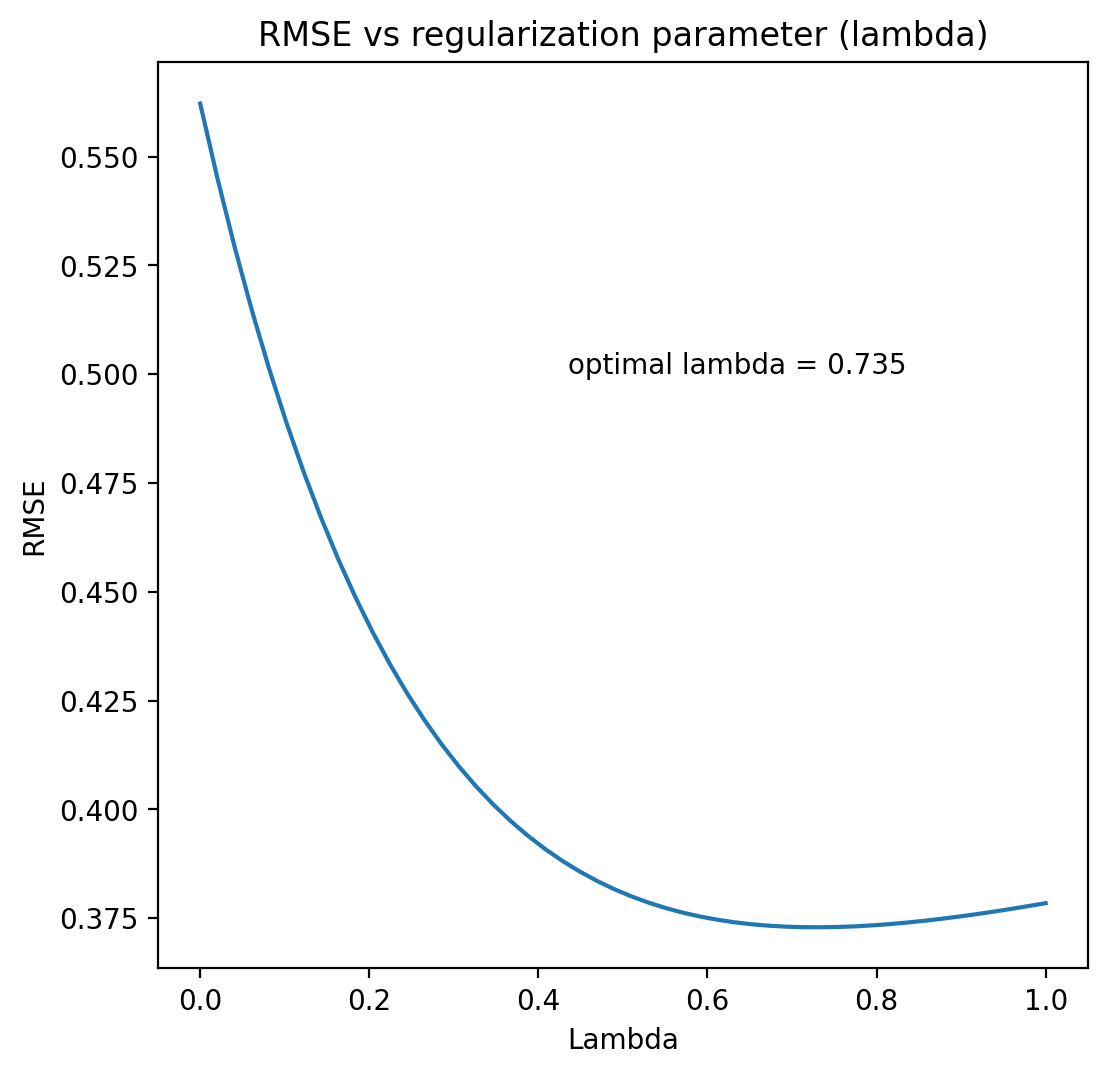

In [12]:
cwd = os.getcwd()
data_dir = '/Users/emilyolafson/GIT/stroke-graph-matching/data'
fc_dir =data_dir + '/precision/'
output_prec = sio.loadmat(fc_dir + 'FCprec_concat_allsub.mat')
rmse = output_prec['rmse'] 
opt_gamma = output_prec['gamma'] 
print(rmse)
gridsearch=np.linspace(0,1,50)

figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')

plt.plot(gridsearch,rmse.transpose())
plt.ylabel('RMSE')
plt.xlabel('Lambda')
plt.title('RMSE vs regularization parameter (lambda)')
plt.text(opt_gamma-0.3, 0.5, 'optimal lambda = ' + str(round(opt_gamma[0][0],3)))
results_dir = '/Users/emilyolafson/GIT/stroke-graph-matching/apaper/figs/'
plt.savefig(results_dir + 'optimal_gamma.png')